In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# TensorFlow / Keras functions
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
# Load the data
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
X = faces.images
y = faces.target.reshape(-1, 1)

num_classes = len(np.unique(y))
num_images = X.shape[0]
images_per_class = num_images // num_classes  # Use integer division for whole images

print(f"Number of images: {num_images}")
print(f"Number of classes: {num_classes}")
print(f"Images per class: {images_per_class}")

Number of images: 400
Number of classes: 40
Images per class: 10


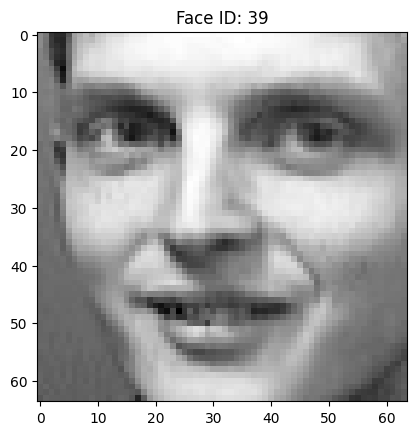

In [24]:
sample_idx = 399
sample_image = X[sample_idx]

# Display the image using matplotlib
plt.imshow(sample_image, cmap=plt.cm.gray)
plt.title(f"Face ID: {y[sample_idx][0]}")
plt.axis('on')  
plt.show()

In [33]:
X_train, y_train = [], []
X_test, y_test = [], []

for person_id in range(num_classes):
    # Indices for images of this person
    idx = np.where(y.flatten() == person_id)[0]
    # Shuffle for randomness
    np.random.shuffle(idx)
    # Split: first 5 to train, next 5 to test
    train_idx = idx[:5]
    test_idx = idx[5:10]
    X_train.extend(X[train_idx])
    y_train.extend(y[train_idx])
    X_test.extend(X[test_idx])
    y_test.extend(y[test_idx])

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Print dimensions
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (200, 64, 64)
y_train shape: (200, 1)
X_test shape: (200, 64, 64)
y_test shape: (200, 1)


In [34]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot (matrix with 40 columns)
y_train_onehot = to_categorical(y_train, num_classes=40)
y_test_onehot = to_categorical(y_test, num_classes=40)

# Print new shapes
print("y_train_onehot shape:", y_train_onehot.shape)
print("y_test_onehot shape:", y_test_onehot.shape)

y_train_onehot shape: (200, 40)
y_test_onehot shape: (200, 40)


In [35]:
# For training images
X_train_reshaped = X_train.reshape((X_train.shape[0], 64, 64, 1))

# For testing images
X_test_reshaped = X_test.reshape((X_test.shape[0], 64, 64, 1))

# Print the new shapes
print("X_train_reshaped shape:", X_train_reshaped.shape)
print("X_test_reshaped shape:", X_test_reshaped.shape)

X_train_reshaped shape: (200, 64, 64, 1)
X_test_reshaped shape: (200, 64, 64, 1)
